## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata,study_results, on="Mouse ID",how='outer')

# Display the data table for preview
df = df.dropna()
df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
mouse_count = len(df['Mouse ID'].value_counts())
print(f'Number of mice = {mouse_count}')

# Double check number of mice
df['Mouse ID'].nunique()

Number of mice = 249


249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)

df['Duplicate'] = duplicates
duplicate_mice_df = df.loc[df['Duplicate']== True,:]

print(duplicate_mice_df['Mouse ID'].value_counts())

g989    10
Name: Mouse ID, dtype: int64


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 

g989_df = df.loc[df['Mouse ID']=='g989',:]
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites,Duplicate
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = df.loc[df['Mouse ID']!='g989',:]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites,Duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [12]:
# Checking the number of mice in the clean DataFrame.

mouse_count = clean_df['Mouse ID'].nunique()
print(f'Number of mice in clean DataFrame: {mouse_count}')


Number of mice in clean DataFrame: 248


## Summary Statistics

In [ ]:
# MY VERSION - groupby drug regimen & timepoint
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM \
# of the tumour volume for each regimen. LECTURE 3.
stats_df = clean_df.groupby(['Drug Regimen','Timepoint'])
mean_se = stats_df['Tumour Volume (mm3)'].mean()

median_se =stats_df['Tumour Volume (mm3)'].median()
stats = pd.merge(mean_se,median_se,on=['Drug Regimen','Timepoint'])
stats = stats.rename(columns={'Tumour Volume (mm3)_x':'Mean',
                              'Tumour Volume (mm3)_y':'Median'})

sdev = stats_df['Tumour Volume (mm3)'].std()
var = stats_df['Tumour Volume (mm3)'].var()

stats['Variance']=var
stats['St.Deviation']=sdev
sem = stats_df['Tumour Volume (mm3)'].sem()
stats['SEM']=sem
stats.head()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.



In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

summary_stats_df = clean_df.groupby('Drug Regimen')
mean_se = summary_stats_df['Tumour Volume (mm3)'].mean()

median_se = summary_stats_df['Tumour Volume (mm3)'].median()
summary_stats = pd.merge(mean_se,median_se,on=['Drug Regimen'])
summary_stats = summary_stats.rename(columns={'Tumour Volume (mm3)_x':'Mean',
                              'Tumour Volume (mm3)_y':'Median'})

sdev = summary_stats_df['Tumour Volume (mm3)'].std()
var = summary_stats_df['Tumour Volume (mm3)'].var()

summary_stats['Variance']=var
summary_stats['St.Deviation']=sdev
sem = summary_stats_df['Tumour Volume (mm3)'].sem()
summary_stats['SEM']=sem
summary_stats.head()

# **Summary statistics = df Grouped by drug regimen & timepoint.**

,Mean,Median,Variance,St.Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [14]:
# Using the aggregation method, produce the same summary statistics in a single line.
# **THIS IS NOT IN THE CHALLENGE INSTRUCTIONS OR REQUIREMENTS SECTION. IGNORE?
drug_list = clean_df['Drug Regimen'].unique()
drug_list
# ** drug_list is used in next section and can be moved to cell below

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Bar and Pie Charts

In [15]:
timepoints = clean_df['Drug Regimen'].value_counts()
timepoints

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

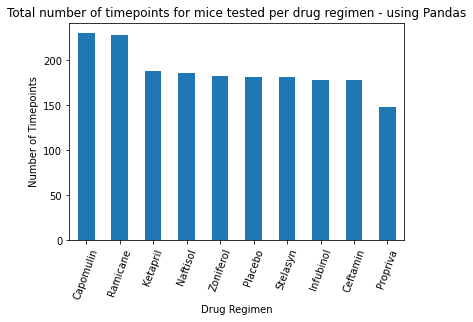

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
fig1 = timepoints.plot(kind='bar',title='Total number of timepoints for mice tested per drug regimen - using Pandas')
fig1.set_xlabel("Drug Regimen")
fig1.set_ylabel("Number of Timepoints")
xtick=timepoints.index
fig1.set_xticklabels(xtick, rotation=70)
plt.show()

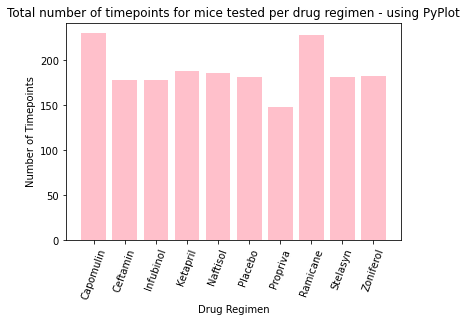

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints = timepoints.sort_index()

drug_list.sort()

plt.bar(drug_list,timepoints,color='pink',align='center')
plt.title('Total number of timepoints for mice tested per drug regimen - using PyPlot')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
new_list = [value for value in drug_list]
plt.xticks(new_list,rotation=70)
plt.show()

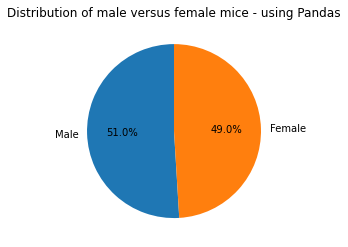

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distr = clean_df['Sex'].value_counts()

pd_pie = sex_distr.plot(kind='pie',y='Sex', autopct='%1.1f%%'\
,title='Distribution of male versus female mice - using Pandas',startangle=90)
plt.axis('off')
plt.show()

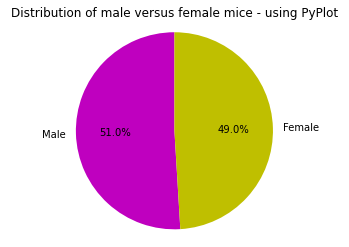

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

clean_df.head(5)
fem_df = clean_df.loc[clean_df['Sex']=='Female',:]
mle_df = clean_df.loc[clean_df['Sex']=='Male',:]
count = [len(mle_df),len(fem_df)]
labels = ['Male','Female']
colours = ['m','y']
plt.pie(count,labels=labels,colors=colours,autopct="%1.1f%%",startangle=90)
plt.axis('equal')
plt.title('Distribution of male versus female mice - using PyPlot')
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumour_df = clean_df.loc[(clean_df['Drug Regimen']=='Capomulin')|(clean_df['Drug Regimen']=='Ramicane')|\
                              (clean_df['Drug Regimen']=='Infubinol')|(clean_df['Drug Regimen']=='Ceftamin'),:]

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint_df=final_tumour_df.groupby('Mouse ID').max()

final_tp = final_timepoint_df['Timepoint']
final_tp = final_tp.rename('Final Timepoint')

final_tp= final_tp.reset_index(drop=False)

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint

merged_df = pd.merge(clean_df,final_tp,on='Mouse ID',how='left')
merged_df
# reduced_df = merged_df.loc[(merged_df['Drug Regimen']=='Capomulin')|(merged_df['Drug Regimen']=='Ramicane')|\
#                               (merged_df['Drug Regimen']=='Infubinol')|(merged_df['Drug Regimen']=='Ceftamin'),:]
# reduced_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites,Duplicate,Final Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,False,45.0
1,k403,Ramicane,Male,21,16,5,38.825898,0,False,45.0
2,k403,Ramicane,Male,21,16,10,35.014271,1,False,45.0
3,k403,Ramicane,Male,21,16,15,34.223992,1,False,45.0
4,k403,Ramicane,Male,21,16,20,32.997729,1,False,45.0
...,...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,False,NaN
1876,z969,Naftisol,Male,9,30,30,65.841013,3,False,NaN
1877,z969,Naftisol,Male,9,30,35,69.176246,4,False,NaN
1878,z969,Naftisol,Male,9,30,40,70.314904,4,False,NaN


In [37]:
# Put treatments into a list for for loop (and later for plot labels).
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
all_counts = []

# Create empty list to fill with tumour vol data (for plotting)
tumour_list =[]

for drug in treatment_list:
    new_df = merged_df.loc[merged_df["Drug Regimen"] == drug,:]
#     i = drug.index
#     count = 0 
#     if merged_df.loc[(merged_df['Drug Regimen']==drug)&(merged_df['Timepoint']==merged_df['Final Timepoint'])]:
#             count = count +1
#             tumour_list.append(merged_df['Tumour Volume (mm3)'])
#             all_counts[i]=count

new_df['Drug Regimen'].value_counts()




    

Ceftamin    178
Name: Drug Regimen, dtype: int64

In [38]:
# for row in merged_df:
#     if (merged_df['Timepoint'])==(merged_df['Final Timepoint']):
#         tumour_list.append(merged_df['Tumour Volume (mm3)'])
#         treatment_counter.append(merged_df['Drug Regimen'])
#         mouse_list.append(merged_df['Mouse ID'])
reduced_df = merged_df.loc[(merged_df['Timepoint'])==(merged_df['Final Timepoint']),:]
print(reduced_df['Timepoint'].value_counts())
print(len(reduced_df['Timepoint'].value_counts()))

reduced_df
# for drug in treatment_list:
#     i = drug.index
#     count = 0 
#     for row in reduced_df:
#         tumour_list.append(reduced_df['Tumour Volume (mm3)'])
#         treatment_counter.append(reduced_df['Drug Regimen'])
#         mouse_list.append(reduced_df['Mouse ID'])

# *work in progress.   
capomulin_df= reduced_df.loc[reduced_df['Drug Regimen']=='Capomulin',:]      
ramicane_df= reduced_df.loc[reduced_df['Drug Regimen']=='Ramicane',:]
infubinol_df= reduced_df.loc[reduced_df['Drug Regimen']=='Infubinol',:]
ceftamin_df= reduced_df.loc[reduced_df['Drug Regimen']=='Ceftamin',:]

45    63
30     9
5      6
35     4
15     4
0      4
25     3
20     3
40     2
10     2
Name: Timepoint, dtype: int64
10


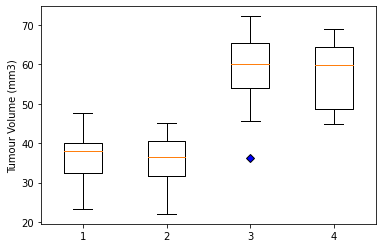

In [39]:
capomulin_tumours = capomulin_df['Tumour Volume (mm3)']
ramicane_tumours = ramicane_df['Tumour Volume (mm3)']
infubinol_tumours = infubinol_df['Tumour Volume (mm3)']
ceftamin_tumours = ceftamin_df['Tumour Volume (mm3)']
all_tumours=[capomulin_tumours, ramicane_tumours, infubinol_tumours, ceftamin_tumours]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Tumour Volume (mm3)')
# ax1.set_xlabel(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
xtick=all_tumours.index
diamond = dict(markerfacecolor='b', marker='D')
ax1.boxplot(all_tumours, flierprops=diamond)

plt.show()

In [41]:
# get quartiles. **REPEAT PROCESS FOR OTHER TREATMENTS USING LOOP
for tumour_group in all_tumours:
    quartiles = tumour_group.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The lower quartile of {tumour_group} is: {lowerq}")
    print(f"The upper quartile of {tumour_group} is: {upperq}")
    print(f"The interquartile range of {tumour_group} is: {iqr}")
    print(f"The the median of {tumour_group} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")


The lower quartile of 19      23.343598
29      28.484033
39      28.430964
64      30.485985
104     31.023923
124     31.896238
134     32.377357
144     33.329098
164     34.455298
204     37.311846
224     36.041047
244     37.074024
282     38.846876
299     38.939633
309     38.982878
317     38.753265
337     38.125164
340     39.952347
350     40.658124
360     40.159220
370     40.728578
380     41.483008
390     41.581521
440     47.685963
1442    46.539206
Name: Tumour Volume (mm3), dtype: float64 is: 32.37735684
The upper quartile of 19      23.343598
29      28.484033
39      28.430964
64      30.485985
104     31.023923
124     31.896238
134     32.377357
144     33.329098
164     34.455298
204     37.311846
224     36.041047
244     37.074024
282     38.846876
299     38.939633
309     38.982878
317     38.753265
337     38.125164
340     39.952347
350     40.658124
360     40.159220
370     40.728578
380     41.483008
390     41.581521
440     47.685963
1442    46.53920

In [ ]:
for row in reduced_df:
        tumour_list.append(reduced_df['Tumour Volume (mm3)'])
        treatment_counter.append(reduced_df['Drug Regimen'])
        mouse_list.append(reduced_df['Mouse ID'])
tumour_list

In [ ]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds# Generate a box plot of the final tumour volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
capo_mice_df = clean_df.loc[clean_df['Drug Regimen']=='Capomulin',:]
capo_mice_df = capo_mice_df.reset_index()
test_mouse_df = clean_df.loc[clean_df['Mouse ID']=='x401',:]

timepoints_list=test_mouse_df['Timepoint'].values.tolist()
tmvol_list=test_mouse_df['Tumour Volume (mm3)'].values.tolist()
plt.plot(timepoints_list,tmvol_list)
plt.xlabel('Days')
plt.ylabel('Tumour Volume (mm3)')
plt.show()


In [ ]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
gr_capo_mice_df = capo_mice_df.groupby('Mouse ID').mean()
weight = gr_capo_mice_df['Weight (g)'].values.tolist()
capo_tumours = gr_capo_mice_df['Tumour Volume (mm3)'].values.tolist()
plt.title('Tumour Volume versus Mouse Weight in mice treated with Capomulin')
plt.xlabel('Mouse Weight in grams')
plt.ylabel('Tumour Volume (mm3)')
plt.scatter(weight,capo_tumours, marker='o',facecolors='r')
plt.show()
print(weight)

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

corr = st.pearsonr(weight, capo_tumours)[0]
print(f'Correlation coefficient is {corr}')

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(weight, capo_tumours)

print('Linear regression equation: Tumour volume = Mouse weight * 0.9544396890241045 + 21.552160532685015')


In [ ]:
y_values = []
x_values = []
for x in range(15,26):
    y = x * slope + intercept
    x_values.append(x)
    y_values.append(y)
y_values
plt.title('Tumour Volume versus Mouse Weight in mice treated with Capomulin')
plt.xlabel('Mouse Weight in grams')
plt.ylabel('Tumour Volume (mm3)')
plt.scatter(weight,capo_tumours, marker='o',facecolors='r')
plt.plot(x_values, y_values)
plt.show()